# **End-Term project**


### Topic: Predicting a person's income level (Adult Income Dataset)

### The purpose of the project
The goal of our project is to build a machine learning model that can predict whether a person earns an income above or below $50,000 per year based on their socio—demographic characteristics. This is a binary classification problem, where the target variable is income (<=50K or >50K).

This project will allow us to apply the full range of skills acquired during the course: from data analysis and preparation to model construction and interpretation. In addition, we will learn how to better structure our experiments and prepare the result for presentation.

Dataset:https://www.kaggle.com/datasets/uciml/adult-census-income

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('adult.csv')

df.head()  # shows first 5 lines



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()  # Displays general information about the dataset
df.describe(include='all')  # Describes all columns, including categorical ones
df.columns  # Lists all column names
df.head()  # Displays the first 5 rows of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# checking for missing values and duplicate rows
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Duplicates: 24


- Missing values are indicated by '?' in categorical columns and need to be handled.

- A small number of exact duplicates will be removed.

In [16]:
# deleting duplicates
df = df.drop_duplicates()

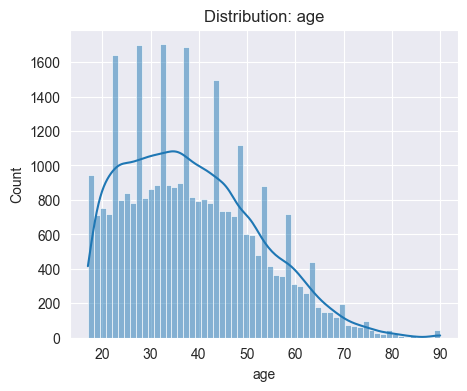

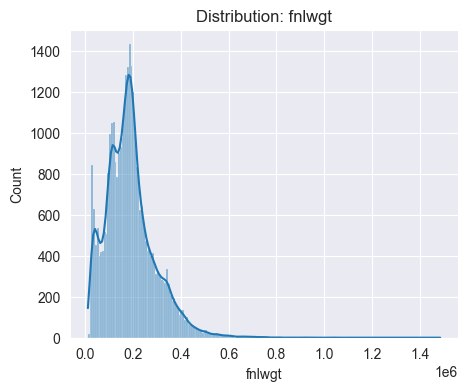

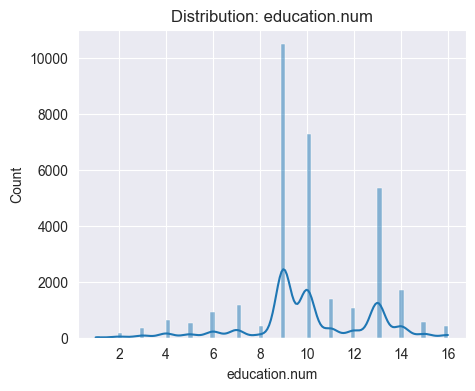

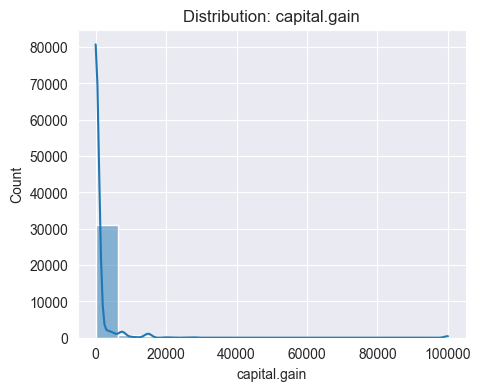

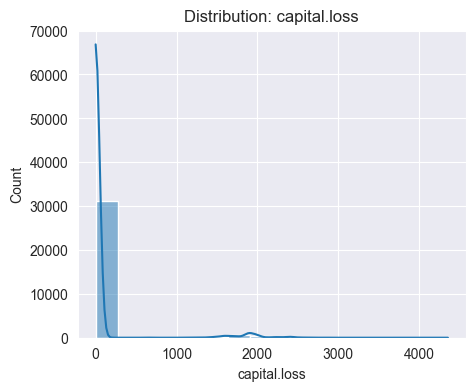

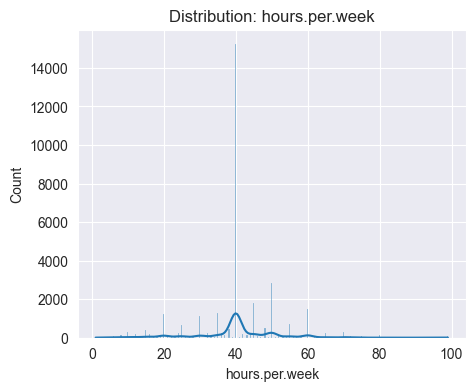

In [28]:
# distributions of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')
    plt.show()

### Numerical-Features

- age: there info about age of people and a lot of people around 20 - 50 years old

- fnlwgt: most of people has final weight around 200,000

- education.num: it show us level of education and most of them has 9th or 10th levels

- capital.gain: it give us info about does people have gained capital, and we can see that a lot of people doesnt have capital

- capital.loss: it give us info about does people have loss capital, and we can see that a lot of people doesnt have capital and so they dont have loss of capital

- hours.per.week: it shows how many time people work per week, and we can see that most of people work 40 hours per week

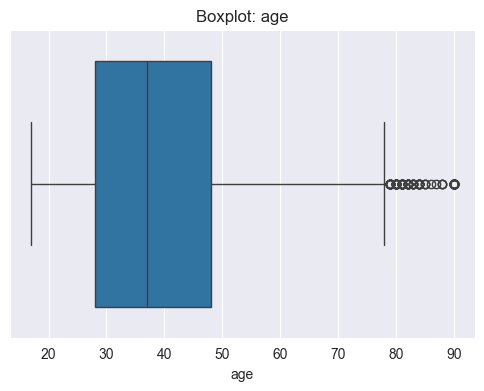

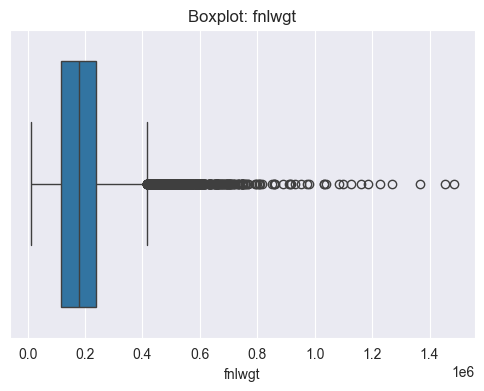

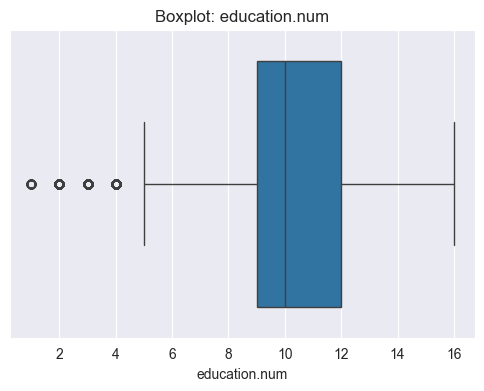

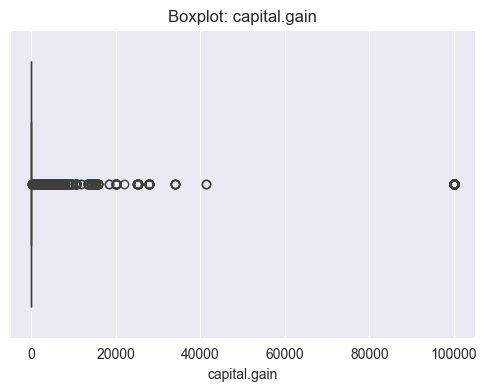

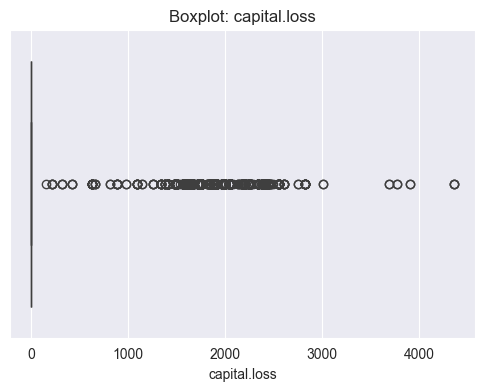

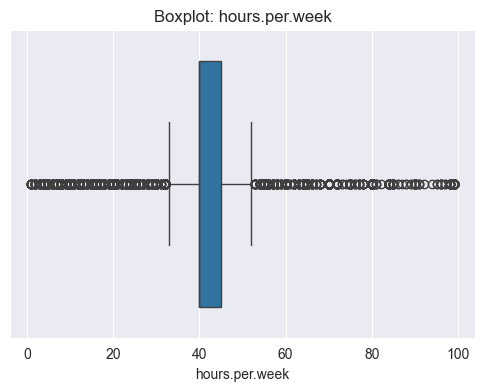

In [10]:
# boxplots for numerical features to identify outliers
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

- There we created boxplot for numerical features to identify outliers

In [11]:
# analyzing categorical features
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    print(f"{col} - unique values: {df[col].nunique()}")
    print(df[col].value_counts(normalize=True)[:5])
    print("-"*40)

workclass - unique values: 9
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Name: proportion, dtype: float64
----------------------------------------
education - unique values: 16
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
Name: proportion, dtype: float64
----------------------------------------
marital.status - unique values: 7
marital.status
Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
Separated             0.031479
Widowed               0.030497
Name: proportion, dtype: float64
----------------------------------------
occupation - unique values: 15
occupation
Prof-specialty     0.127146
Craft-repair       0.125887
Exec-managerial    0.124873
Adm-clerical       0.115783
Sales              0.112097
Name: proportion, dtype: float64
----------

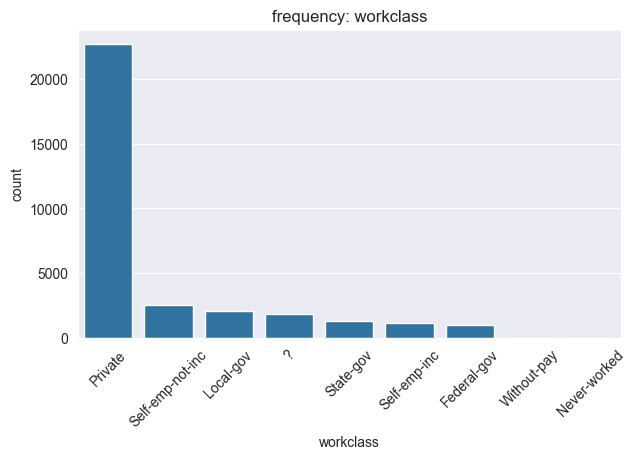

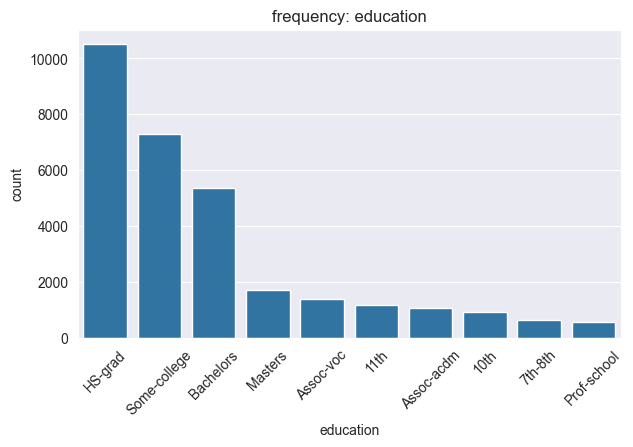

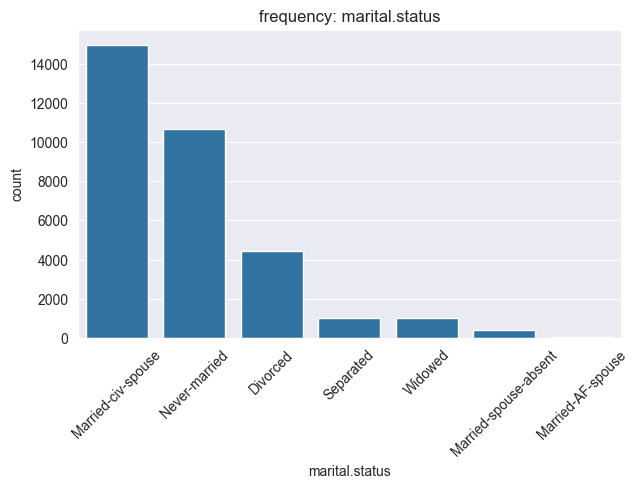

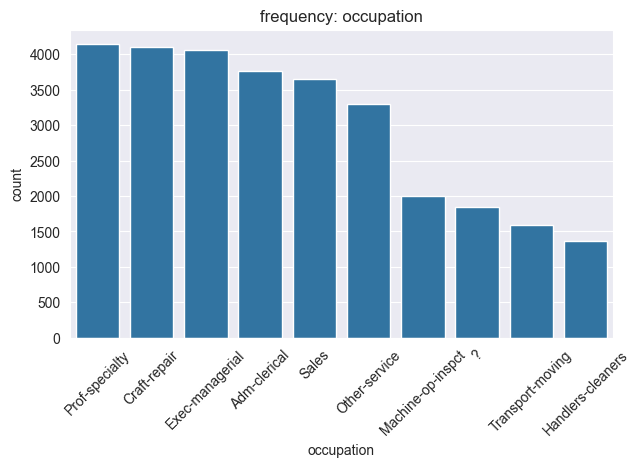

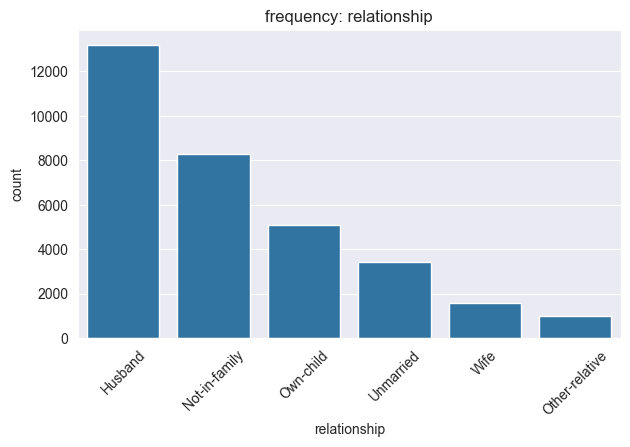

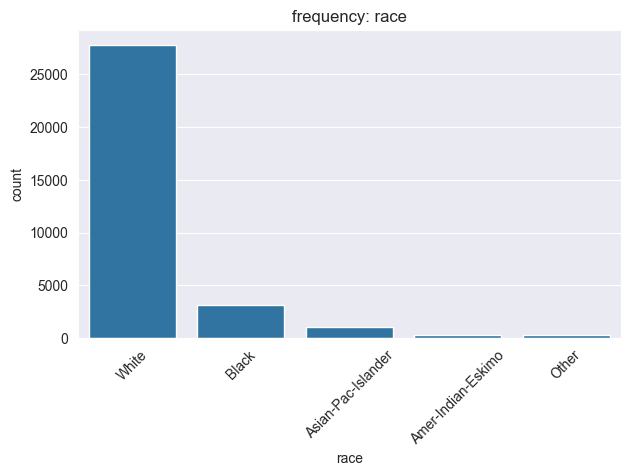

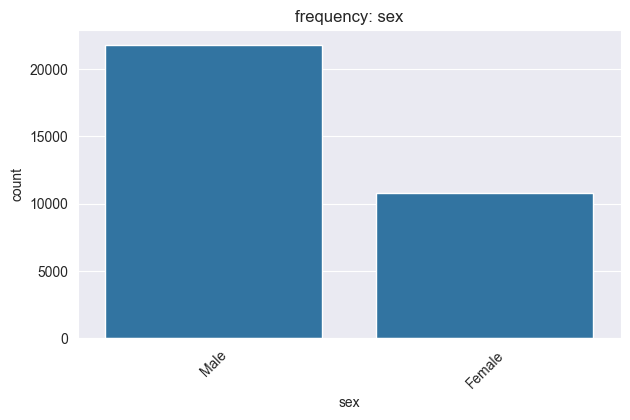

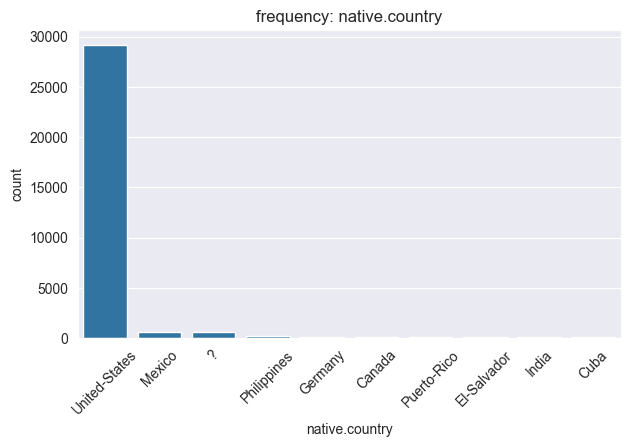

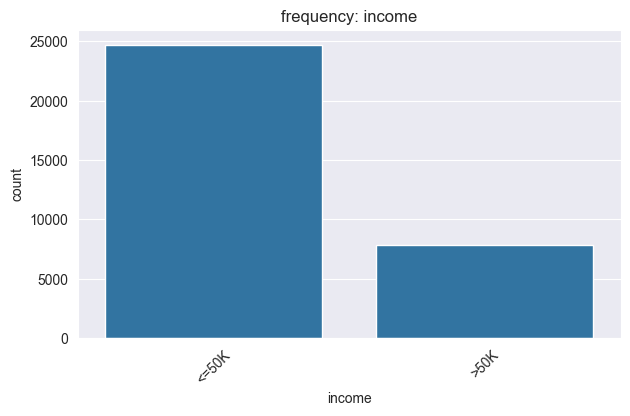

In [12]:
# visualizing top 10 most frequent values for each categorical feature
for col in cat_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'frequency: {col}')
    plt.xticks(rotation=45)
    plt.show()

### Categorial Features

- workclass: it shows us workclass of people, and we can see that most of the people doesnt say their workclass

- education: it shows us max qualified education that they have and most of them has high school or college education

- marital.status: it shows us marital status and most of the people have married

- occupation: there we can see that the top three are very close to each other first is prof speciality second craft repair third exec managerial

- relationship: we can see top 1 is says that they someone's husband and approximately 20 % has child

- sex: most of them is white

- native.country: most of them from USA

- income: and finally income it gives us information about how much money people earn in a year, and we can see that most of them earn less than 50$k in year

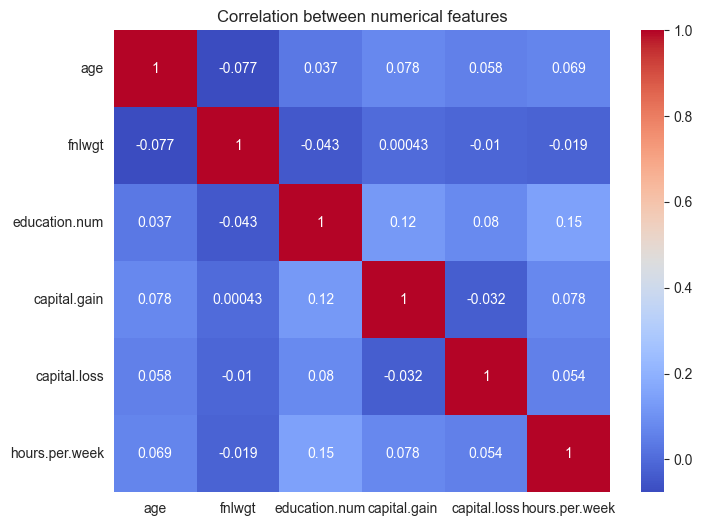

In [13]:
# visualizing correlation matrix for numerical features
corr_matrix = df[num_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between numerical features")
plt.show()

- this graph shos us the correlation between numerical features, and there are the biggest and smallest relation biggest: between education.num and hours.per.work its 0.15; smallest: between age and fnlwgt its -0.077

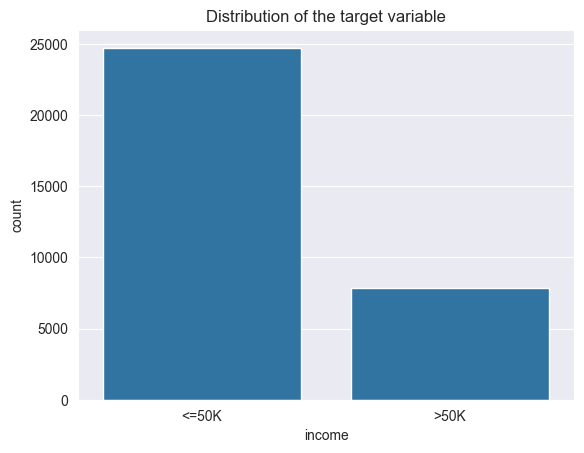

In [26]:
# distribution of the target variable
sns.countplot(data=df, x='income')
plt.title("Distribution of the target variable")
plt.show()

- income: and finally income it gives us information about how much money people earn in a year, and we can see that most of them earn less than 50$k in year

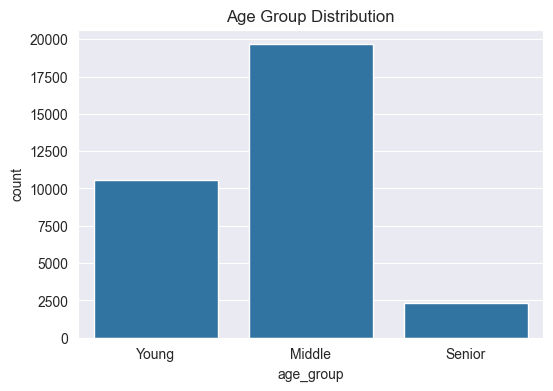

In [27]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle', 'Senior'])
plt.figure(figsize=(6,4))
sns.countplot(x=df['age_group'], order=['Young','Middle','Senior'])
plt.title('Age Group Distribution')
plt.show()

- we can see that a lot of people in middle age group

Preprocessing: Scaling and Encoding

In [15]:
X = df.drop('income', axis=1)
y = df['income']

num_cols = X.select_dtypes(exclude='object').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse=False), cat_cols)
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# encoding target
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc  = label_encoder.transform(y_test)

# all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM (Linear Kernel)': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

plt.figure(figsize=(10, 8))

# Проход по всем моделям
for name, model in models.items():
    steps = [('preprocessor', preprocessor)]

    # Только для Naive Bayes добавим преобразование в dense
    if name == 'Naive Bayes':
        steps.append(('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)))

    steps.append(('classifier', model))

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train_enc)
    y_pred = pipe.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", round(accuracy_score(y_test_enc, y_pred), 3))
    print("Precision:", round(precision_score(y_test_enc, y_pred), 3))
    print("Recall:", round(recall_score(y_test_enc, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test_enc, y_pred), 3))



Logistic Regression
Accuracy: 0.843
Precision: 0.722
Recall: 0.597
F1 Score: 0.653

Random Forest
Accuracy: 0.842
Precision: 0.717
Recall: 0.605
F1 Score: 0.656

KNN
Accuracy: 0.826
Precision: 0.664
Recall: 0.609
F1 Score: 0.635

SVM (Linear Kernel)
Accuracy: 0.84
Precision: 0.722
Recall: 0.579
F1 Score: 0.642

Naive Bayes
Accuracy: 0.481
Precision: 0.317
Recall: 0.945
F1 Score: 0.475

Gradient Boosting
Accuracy: 0.86
Precision: 0.777
Recall: 0.611
F1 Score: 0.684

XGBoost
Accuracy: 0.864
Precision: 0.771
Recall: 0.645
F1 Score: 0.702


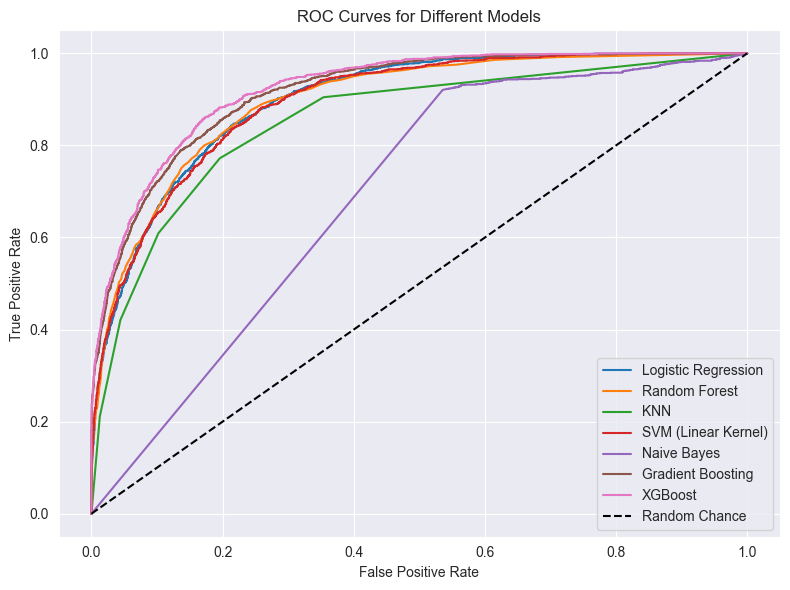

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    steps = [('preprocessor', preprocessor)]

    if name == 'Naive Bayes':
        steps.append(('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)))

    steps.append(('classifier', model))

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train_enc)

    if hasattr(pipe.named_steps['classifier'], "predict_proba"):
        y_scores = pipe.predict_proba(X_test)[:, 1]
    else:
        y_scores = pipe.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_enc, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name}')


plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


- the best module XGBoost so we choose this

In [57]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth':    [3, 6],
    'classifier__learning_rate':[0.01, 0.1]
}

pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

gs = GridSearchCV(
    pipe_xgb,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train_enc)

print("Best parameters:", gs.best_params_)
print("Best CV accuracy:", gs.best_score_)

baseline = pipe_xgb
baseline.fit(X_train, y_train_enc)

print("Baseline accuracy:", accuracy_score(y_test_enc, baseline.predict(X_test)))
print("Tuned accuracy:",   accuracy_score(y_test_enc, gs.predict(X_test)))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best CV accuracy: nan
Baseline accuracy: 0.8640808884468755
Tuned accuracy: 0.805237858445218


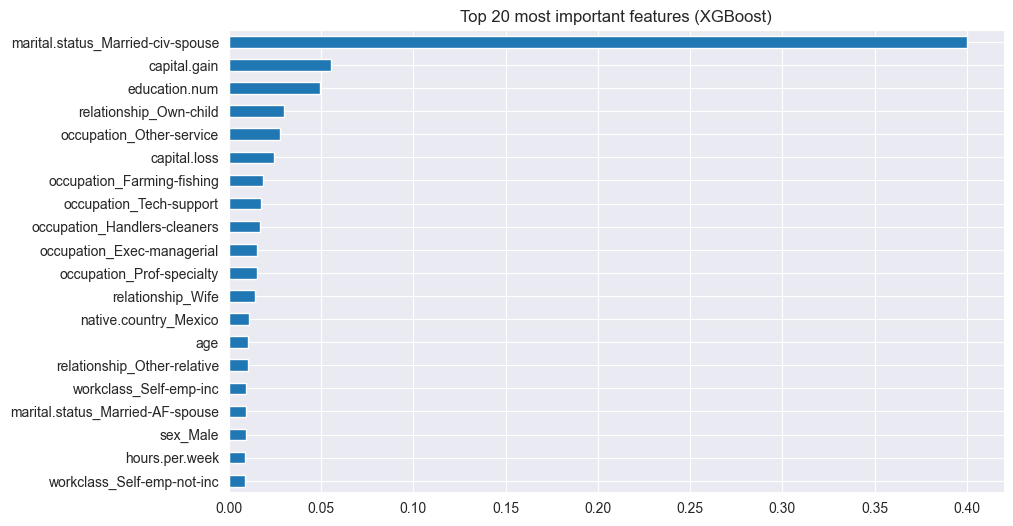

In [58]:
pipe_xgb.fit(X_train, y_train_enc)
xgb_model = pipe_xgb.named_steps['classifier']
importances = xgb_model.feature_importances_
feature_names = pipe_xgb.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(feature_names)
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh')
plt.title("Top 20 most important features (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

- the top 1 is marital status married  an it has power of 40% of model that means that people earn more that 50 k in year when the married


### Modeling & Results:

Tried a range of classifiers in a pipeline : Logistic Regression, Random Forest, KNN, SVM, Naive Bayes, Gradient Boosting, XGBoost.

XGBoost (with tuned hyperparameters) gave the best ROC and accuracy.

Feature‑importance from XGBoost showed marital status, capital gain, and education level as top predictors.

Key Takeaways & Limitations:

Weak correlations among numericals mean each brings unique information.

Skewed features like capital gains/losses should be transformed to tame outliers.

A final model (XGBoost) achieves good discrimination but could be improved by:

Balancing classes

Adding more engineered features .

Exploring ensemble blends or deeper hyperparameter searches.

### Conclusion

Most people in the data are middle‑aged (around 28–48 years old), work about 40 hours a week, and have little to no one‑off (capital) gains or losses. The six number fields (age, weight, education years, capital gain, capital loss, hours/week) barely move together, so each adds its own information to the model. When we tried different algorithms, gradient‑boosted trees (XGBoost and Gradient Boosting) separated high‑ and low‑income earners best. According to XGBoost, the single strongest sign of earning over $50 K is being married (civilian spouse), followed by having any capital gains and more years of education.